# EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


df = pd.read_csv("train.csv")


print(f"Dataset Loaded: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()


Dataset Loaded: 1914056 rows, 45 columns


,Unique ID,Rider_ID,category_x,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Track_Condition,Humidity_%,Tire_Compound_Front,...,air,ground,starts,finishes,with_points,podiums,wins,min_year,max_year,years_active
0,1894944,2659,Moto2,4.874,22,17,264.66,Wet,61,Hard,...,23,35,53,45,41,4,0,2018,2021,4
1,23438,5205,Moto2,3.875,24,7,177.56,Wet,77,Soft,...,12,12,27,27,22,2,1,1975,1983,8
2,939678,7392,Moto3,5.647,25,5,317.74,Dry,87,Soft,...,22,23,45,43,10,0,0,1982,1989,8
3,1196312,7894,Moto3,4.810,19,3,321.82,Wet,43,Soft,...,23,35,192,172,155,16,9,1994,2009,16
4,1033899,6163,MotoGP,5.809,25,21,239.92,Wet,47,Hard,...,22,31,175,146,132,29,17,2011,2021,11


## Basic analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914056 entries, 0 to 1914055
Data columns (total 45 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Unique ID                        int64  
 1   Rider_ID                         int64  
 2   category_x                       object 
 3   Circuit_Length_km                float64
 4   Laps                             int64  
 5   Grid_Position                    int64  
 6   Avg_Speed_kmh                    float64
 7   Track_Condition                  object 
 8   Humidity_%                       int64  
 9   Tire_Compound_Front              object 
 10  Tire_Compound_Rear               object 
 11  Penalty                          object 
 12  Championship_Points              int64  
 13  Championship_Position            int64  
 14  Session                          object 
 15  year_x                           int64  
 16  sequence                         int64  
 17  rider   

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unique ID,1914056.0,NaN,NaN,NaN,1367776.898592,789062.957285,0.0,684734.75,1368276.5,2050815.25,2734366.0
Rider_ID,1914056.0,NaN,NaN,NaN,5509.394095,2597.185731,1000.0,3258.0,5514.0,7760.0,9998.0
category_x,1914056,3,Moto2,640761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Circuit_Length_km,1914056.0,NaN,NaN,NaN,4.701208,0.691097,3.5,4.104,4.702,5.299,5.9
Laps,1914056.0,NaN,NaN,NaN,21.501891,2.293772,18.0,19.0,22.0,24.0,25.0
Grid_Position,1914056.0,NaN,NaN,NaN,11.498187,6.334418,1.0,6.0,12.0,17.0,22.0
Avg_Speed_kmh,1914056.0,NaN,NaN,NaN,249.632787,57.735248,150.0,199.35,249.65,299.46,350.0
Track_Condition,1914056,2,Wet,959552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Humidity_%,1914056.0,NaN,NaN,NaN,59.51643,17.337066,30.0,44.0,60.0,75.0,89.0
Tire_Compound_Front,1914056,3,Medium,639333,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Penalty    321292
dtype: int64

## Value Count for Category Column

In [8]:
cat_cols = ['category_x', 'Track_Condition', 'Tire_Compound_Front', 'Tire_Compound_Rear', 
            'Session']

for col in cat_cols:
    print(f"\n📊 Value Counts for {col}:")
    print(df[col].value_counts())


📊 Value Counts for category_x:
category_x
Moto2     640761
MotoGP    639313
Moto3     633982
Name: count, dtype: int64

📊 Value Counts for Track_Condition:
Track_Condition
Wet    959552
Dry    954504
Name: count, dtype: int64

📊 Value Counts for Tire_Compound_Front:
Tire_Compound_Front
Medium    639333
Soft      638047
Hard      636676
Name: count, dtype: int64

📊 Value Counts for Tire_Compound_Rear:
Tire_Compound_Rear
Soft      641825
Medium    638615
Hard      633616
Name: count, dtype: int64

📊 Value Counts for Session:
Session
Race          275412
FP3           274856
FP1           274605
Qualifying    272947
FP2           272755
FP4           272259
Sprint        271222
Name: count, dtype: int64


## Target Value Distribution

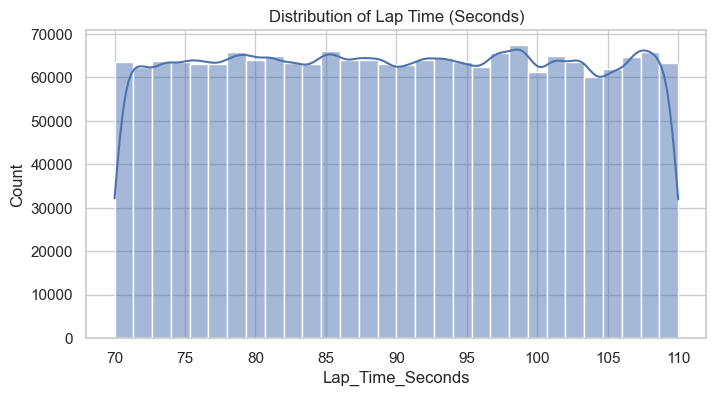

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Lap_Time_Seconds'], bins=30, kde=True)
plt.title("Distribution of Lap Time (Seconds)")
plt.xlabel("Lap_Time_Seconds")
plt.ylabel("Count")
plt.show()

## Correlation matrix of Numerical Columns

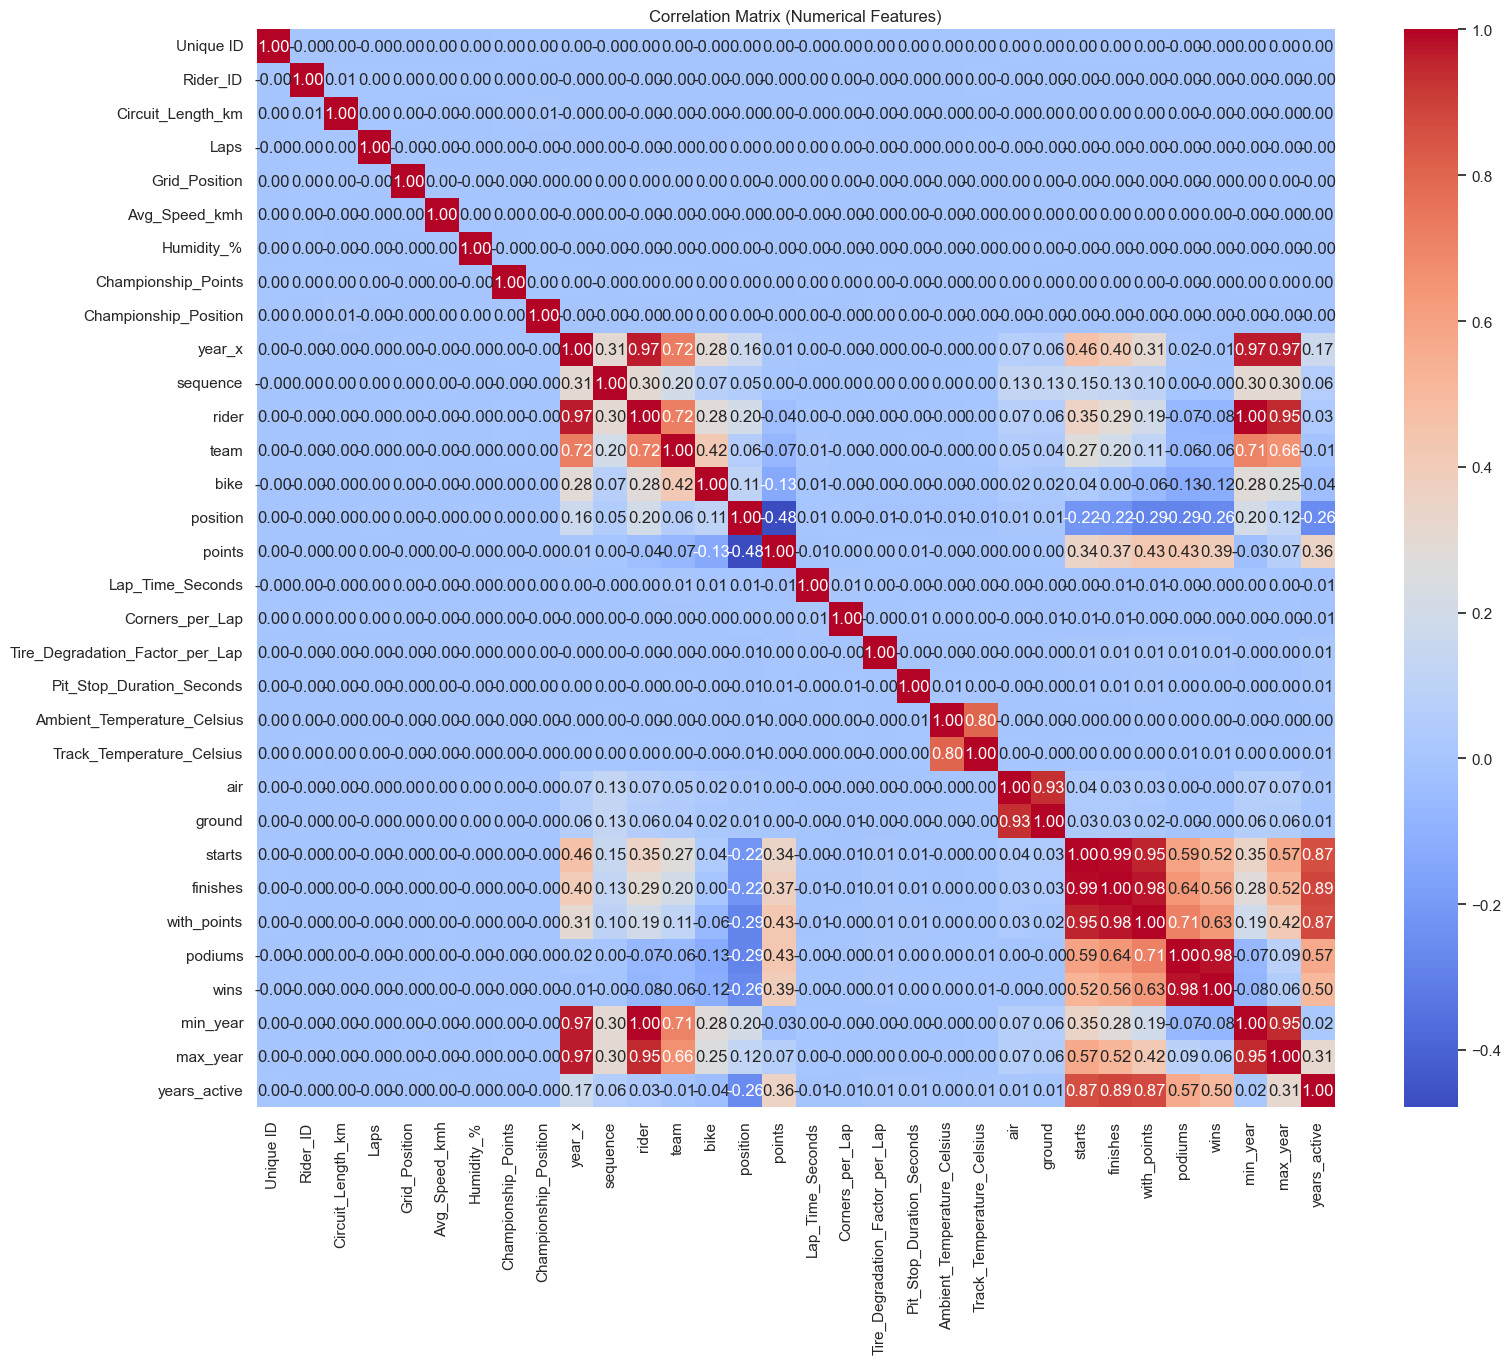

In [11]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

# ML PIPELINE ( was run as a .py file, content of that added here)

In [ ]:
import pandas as pd
import numpy as np
import os
import joblib
from flaml import AutoML
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
TARGET_COLUMN = "Lap_Time_Seconds"
MODEL_DIR = "flaml_motogp_model"
TRAIN_PATH = "train.csv"
VAL_PATH = "val.csv"
TEST_PATH = "test.csv"
DROP_COLS = ["Unique ID", "Rider_name", "Team_name", "Bike_name", "Shortname", "Circuit_name"]

In [ ]:
def load_data(path):
    df = pd.read_csv(path)
    print(f"Loaded {path} with shape {df.shape}")
    return df

def preprocess(df, target_col=None):
    df = df.copy()
    df.columns = df.columns.str.strip()

    
    for col in DROP_COLS:
        if col in df.columns:
            df.drop(columns=col, inplace=True)

    
    if target_col and target_col in df.columns:
        target = df[target_col]
    else:
        target = None

    
    for col in df.select_dtypes(include='object').columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            df[col] = df[col].astype('category').cat.codes

    
    df.fillna(df.median(numeric_only=True), inplace=True)

    if target is not None:
        df[target_col] = target

    return df

In [ ]:
def train_flaml(X, y):
    automl = AutoML()

    settings = {
        "time_budget": 6600,  
        "metric": 'rmse',
        "task": 'regression',
        "estimator_list": ['lgbm'],
        "log_file_name": "motogp_flaml.log",
        "starting_points": {
            "lgbm": {
                "n_estimators": 50,
                "num_leaves": 11736,
                "min_child_samples": 3,
                "learning_rate": 0.29899735606397315,
                "log_max_bin": 7,
                "colsample_bytree": 0.345753331470006,
                "reg_alpha": 0.0009765625,
                "reg_lambda": 0.03998672339022226,
            }
        }
    }

    automl.fit(X_train=X, y_train=y, **settings)
    print("Best Estimator:", automl.model.estimator)
    print("Best Hyperparameters:", automl.best_config)
    return automl

In [ ]:
def save_model(automl, scaler, feature_order):
    os.makedirs(MODEL_DIR, exist_ok=True)
    joblib.dump((automl, scaler), os.path.join(MODEL_DIR, "model.pkl"))
    with open(os.path.join(MODEL_DIR, "features.txt"), 'w') as f:
        for feat in feature_order:
            f.write(f"{feat}\n")

def load_model():
    model, scaler = joblib.load(os.path.join(MODEL_DIR, "model.pkl"))
    with open(os.path.join(MODEL_DIR, "features.txt"), 'r') as f:
        feature_order = [line.strip() for line in f.readlines()]
    return model, scaler, feature_order

def evaluate(model, X, y):
    preds = model.predict(X)
    rmse = mean_squared_error(y, preds)
    r2 = r2_score(y, preds)
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

In [ ]:
def main():
    print("Loading training data...")
    train_df = load_data(TRAIN_PATH)
    train_df = preprocess(train_df, TARGET_COLUMN)

    y_train = train_df[TARGET_COLUMN]
    X_train = train_df.drop(columns=[TARGET_COLUMN])

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    print("Training FLAML model...")
    model = train_flaml(X_train_scaled, y_train)
    save_model(model, scaler, X_train.columns)

    print("Model trained and saved.")

    print("Validating on validation data...")
    val_df = load_data(VAL_PATH)
    val_df = preprocess(val_df, TARGET_COLUMN)
    y_val = val_df[TARGET_COLUMN]
    X_val = val_df.drop(columns=[TARGET_COLUMN])
    X_val_scaled = scaler.transform(X_val)
    evaluate(model, X_val_scaled, y_val)

    print("Predicting on test data...")
    test_df = load_data(TEST_PATH)
    test_processed = preprocess(test_df)
    for col in X_train.columns:
        if col not in test_processed.columns:
            test_processed[col] = 0
    test_processed = test_processed[X_train.columns]
    X_test_scaled = scaler.transform(test_processed)

    preds = model.predict(X_test_scaled)
    result_df = test_df.copy()
    result_df["Lap_Time_Seconds_Predicted"] = preds
    result_df.to_csv("test_predictions.csv", index=False)

    print("Predictions saved to 'test_predictions.csv'")

In [ ]:
if __name__ == "__main__":
    main()